 # Marketing Data Science Case study
 
 ## Problem Statement:
This data is about a Global financial servies company with mututal funds sales as of their business and they want to maximize the sales by making successful sales call to their financial advisors. The task is to find factors that can make these calls successful and identify from the data which advisors to call on priority basis.

The target variable is call successful or not. It is a two class classification problem with target variable nearly balanced.

In [26]:
#Package import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
#Reading Data

data_x = pd.read_excel("Dataset - DS roles - v2.xlsx", sheet_name = "X")
data_y = pd.read_excel("Dataset - DS roles - v2.xlsx", sheet_name = "Y")

Shared Column Name	Shared Description

![image.png](attachment:image.png)

In [28]:
#checking the Shape of Data X
print(data_x.shape)
data_x.head()

(38953, 13)


,idx,MO_NUM,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,2443,202008,NaN,NaN,NaN,NaN,NaN,0.00,10,S3,C4,22.0,0.0
1,5005,202010,NaN,0.0,0.0,NaN,NaN,5817.04,10,S2,C3,22.0,0.0
2,5028,202007,NaN,1.0,0.0,NaN,NaN,0.00,10,S2,C4,22.0,0.0
3,109,202006,NaN,2.0,0.0,NaN,NaN,0.00,10,S2,C4,22.0,0.0
4,2304,202006,NaN,2.0,0.0,NaN,NaN,0.00,10,S2,C4,22.0,0.0


In [29]:
#checking the Shape of Data Y
print(data_y.shape)
data_y.head()

(38953, 3)


,idx,Y,Y_MO_NUM
0,3632,0,202002
1,4932,0,202002
2,1763,1,202002
3,4588,0,202003
4,435,0,202003


### Merging data

In [30]:
data = data_x.merge(data_y, on = "idx", how = "left")
data.shape

(38953, 15)

In [31]:
data.head()

,idx,MO_NUM,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y,Y_MO_NUM
0,2443,202008,NaN,NaN,NaN,NaN,NaN,0.00,10,S3,C4,22.0,0.0,0,202009
1,5005,202010,NaN,0.0,0.0,NaN,NaN,5817.04,10,S2,C3,22.0,0.0,0,202011
2,5028,202007,NaN,1.0,0.0,NaN,NaN,0.00,10,S2,C4,22.0,0.0,0,202008
3,109,202006,NaN,2.0,0.0,NaN,NaN,0.00,10,S2,C4,22.0,0.0,0,202007
4,2304,202006,NaN,2.0,0.0,NaN,NaN,0.00,10,S2,C4,22.0,0.0,0,202007


From the above dataframe we can see a lot of null values in our data. We will check the percentage of the null values and then impute the null values with the right method. 

In [32]:
temp = data.copy()


### Checking the percentage of null values 

In [33]:
print("Null values in X in percent\n", pd.DataFrame(round((data.isnull().sum()/data.shape[0])*100,2), columns = ['Percentage']))

Null values in X in percent
           Percentage
idx             0.00
MO_NUM          0.00
X1             42.28
X2             29.61
X3             29.61
X4             60.22
X5             81.51
X6              0.00
X7              0.00
X8              0.47
X9              1.50
X10             3.72
X11             0.98
Y               0.00
Y_MO_NUM        0.00




1.   **Dropping X5 because null values are greater than 80 %, hence it's of NO USE**
2.   **Dropping Y and Y_MO_NUM as we have the data only for 2020 and hence the year is of no use to us**




In [34]:
data = data.drop(['X5'], axis = 1)

In [35]:
#checking the Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38953 entries, 0 to 38952
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idx       38953 non-null  int64  
 1   MO_NUM    38953 non-null  int64  
 2   X1        22484 non-null  float64
 3   X2        27418 non-null  float64
 4   X3        27418 non-null  float64
 5   X4        15494 non-null  float64
 6   X6        38953 non-null  float64
 7   X7        38953 non-null  int64  
 8   X8        38768 non-null  object 
 9   X9        38369 non-null  object 
 10  X10       37503 non-null  float64
 11  X11       38571 non-null  float64
 12  Y         38953 non-null  int64  
 13  Y_MO_NUM  38953 non-null  int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 4.5+ MB


### splitting the date feature

We have dates in our data in YYYYMM format which is not a standard format so it can be splitted to create year and month feature which can be further used to analyze the data.

In [36]:
data['Y_MO_NUM'] = pd.to_datetime(data['Y_MO_NUM'], format='%Y%m', errors='ignore')
data['Y_YEAR'] = pd.DatetimeIndex(data['Y_MO_NUM']).year
data['Y_MONTH'] = pd.DatetimeIndex(data['Y_MO_NUM']).month

In [37]:
data['MO_NUM'] = pd.to_datetime(data['MO_NUM'], format='%Y%m', errors='ignore')
data['YEAR'] = pd.DatetimeIndex(data['MO_NUM']).year
data['MONTH'] = pd.DatetimeIndex(data['MO_NUM']).month

In [38]:
data.columns

Index(['idx', 'MO_NUM', 'X1', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'Y', 'Y_MO_NUM', 'Y_YEAR', 'Y_MONTH', 'YEAR', 'MONTH'],
      dtype='object')

In [39]:
data = data.drop(['Y_YEAR','YEAR','Y_MO_NUM',"MO_NUM"], axis = 1 )
data.columns

Index(['idx', 'X1', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'Y', 'Y_MONTH', 'MONTH'],
      dtype='object')

**Handling NULL values by imputation**

## Checking the distribution of all the variables using histograms 

In [40]:
data.describe()

,idx,X1,X2,X3,X4,X6,X7,X10,X11,Y,Y_MONTH,MONTH
count,3.895300e+04,22484.000000,27418.000000,27418.000000,15494.000000,3.895300e+04,38953.000000,37503.000000,38571.000000,38953.000000,38953.000000,38953.000000
mean,6.169590e+10,3.142991,3.099752,0.154169,127.281077,1.594924e+04,17.343799,12.871930,0.195587,0.463199,6.525069,5.707750
std,3.786079e+10,3.057640,2.580549,0.487257,283.113661,3.703809e+04,5.762268,7.339929,0.396657,0.498650,3.047275,3.070185
min,2.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000e+00,10.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.576981e+10,1.000000,1.000000,0.000000,9.000000,5.951039e+03,12.000000,5.000000,0.000000,0.000000,4.000000,3.000000
50%,6.012955e+10,2.000000,3.000000,0.000000,34.000000,7.563625e+03,17.000000,15.000000,0.000000,0.000000,6.000000,5.000000
75%,9.448928e+10,4.000000,5.000000,0.000000,112.000000,1.403174e+04,22.000000,20.000000,0.000000,1.000000,9.000000,8.000000
max,1.202591e+11,51.000000,13.000000,6.000000,10289.000000,3.023358e+06,38.000000,22.000000,1.000000,1.000000,12.000000,12.000000


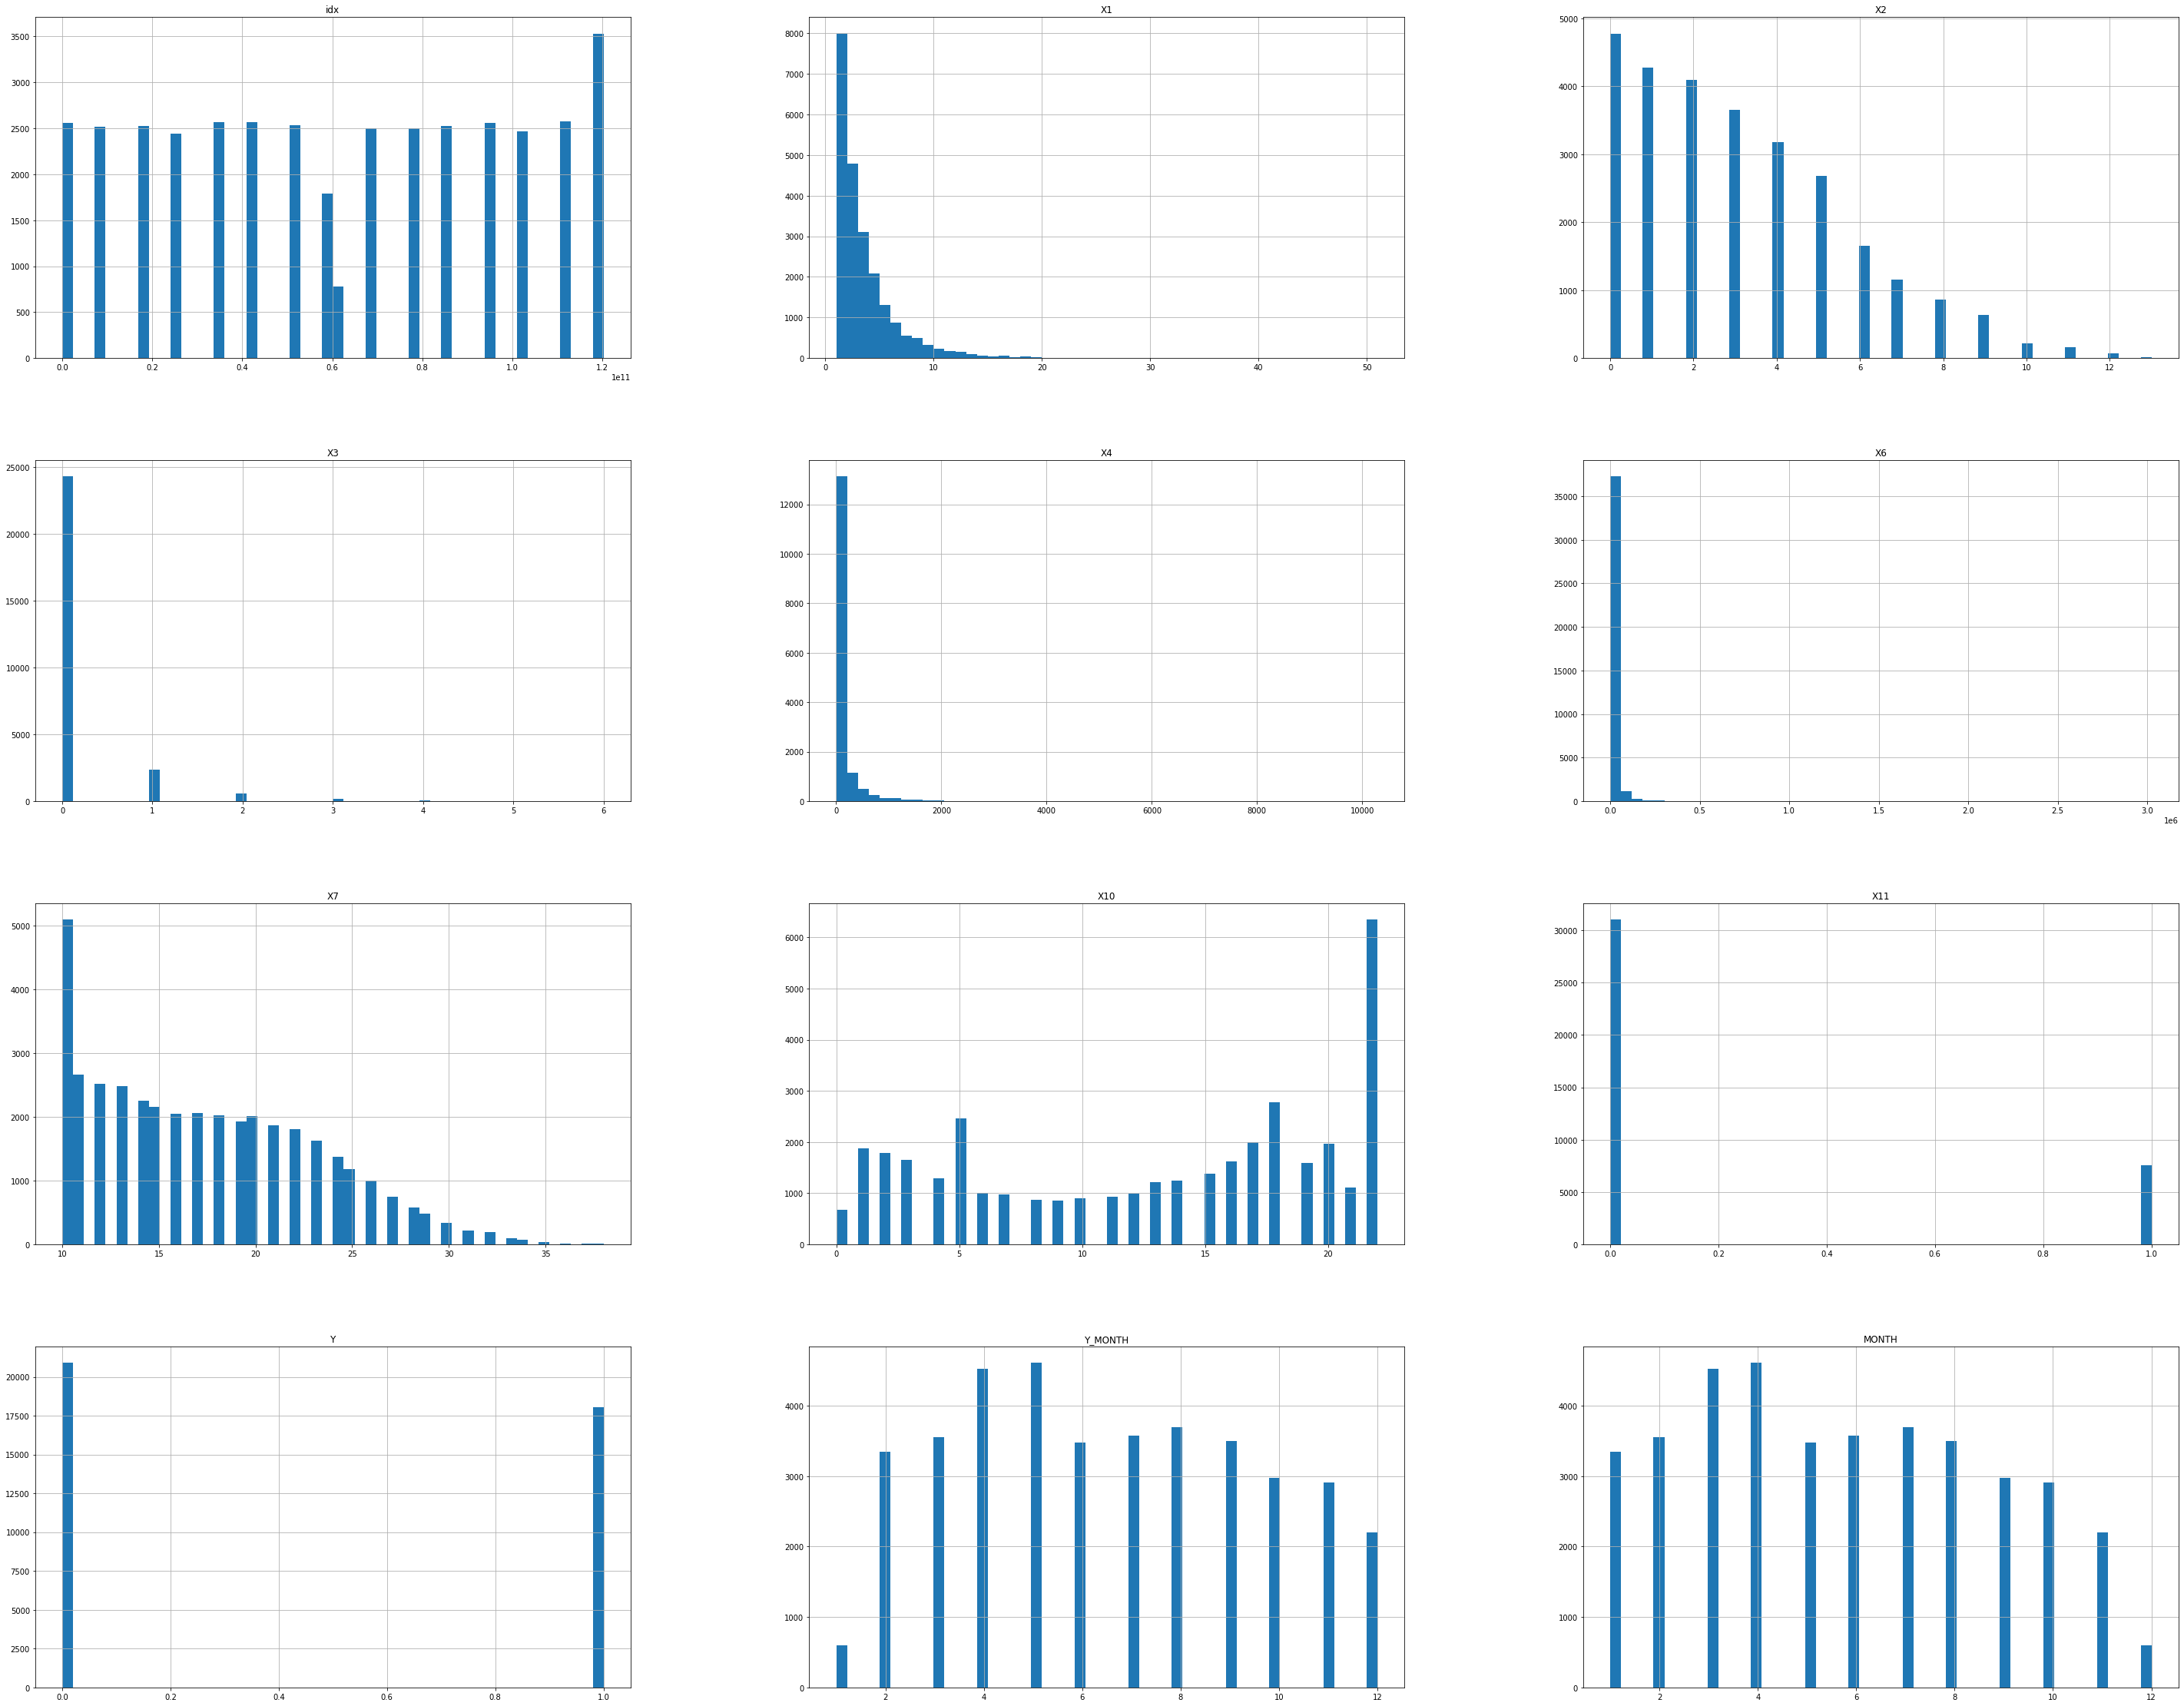

In [41]:
data.hist(bins=50, figsize=(50, 40))
plt.show()

We can observe from the above plots that 

In [42]:
def impute_median(df, col):
  df[col] = df[col].fillna(df[col].median())
  


cols_to_impute = ['X1','X2',"X3","X4","X10"]
for col in cols_to_impute:
  impute_median(data, col)


## Imputing the categorical variables with the most frequent values
data['X8'] = data['X8'].fillna('S2')
data['X9'] = data['X9'].fillna('C3')
data['X11'] = data['X11'].fillna(0.0)

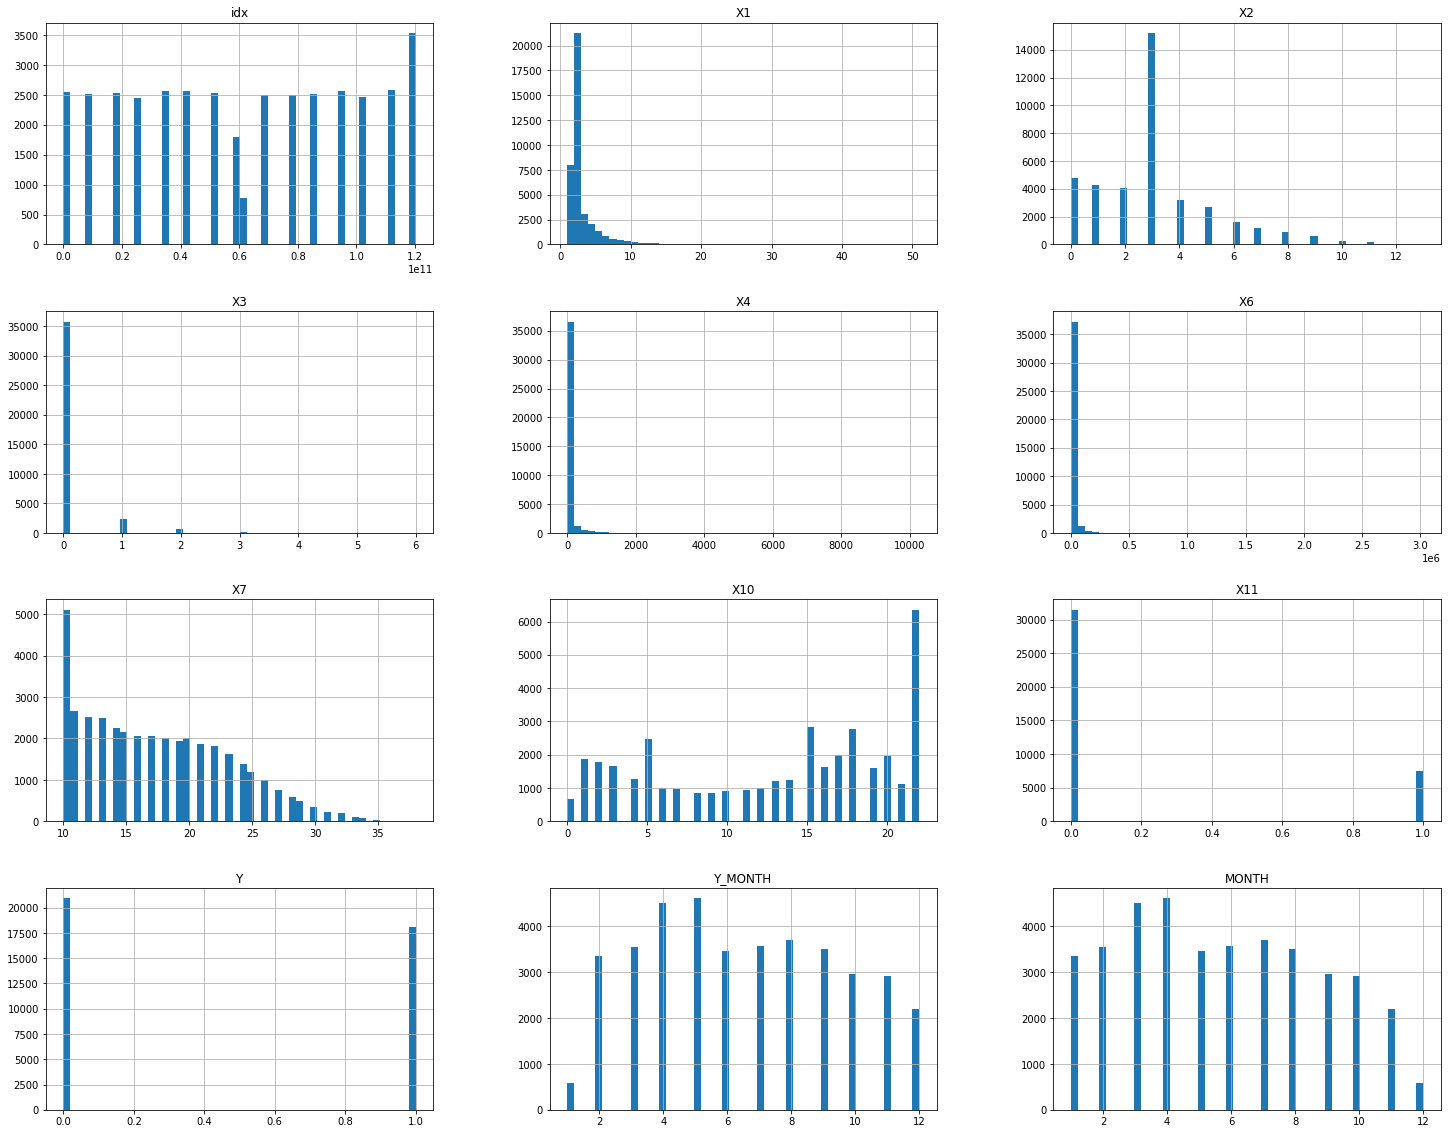

In [43]:
data.hist(bins=50, figsize=(25, 20))
plt.show()

In [44]:
print("Null values in X in percent\n", pd.DataFrame(round((data.isnull().sum()/data.shape[0])*100,2), columns = ['Percentage']))

Null values in X in percent
          Percentage
idx             0.0
X1              0.0
X2              0.0
X3              0.0
X4              0.0
X6              0.0
X7              0.0
X8              0.0
X9              0.0
X10             0.0
X11             0.0
Y               0.0
Y_MONTH         0.0
MONTH           0.0


## Handling Outliers as we observe that many of the variables have values which are out of 3SD ranges and hence affect our model

# Visualizing Outliers using BoxPlots

In [45]:
import plotly.express as px

fig = px.box(data, y="X1", points="all")
fig.show()

In [46]:
fig = px.box(data, y="X2", points="all")
fig.show()

In [47]:
fig = px.box(data, y="X3", points="all")
fig.show()

In [48]:
fig = px.box(data, y="X4", points="all")
fig.show()

## We can clearly see the outliers in all the features and hence we decide to impute the outliers so as to maintain data consistency

In [49]:
data.loc[data["X1"] > data["X1"].mean() + 3*data["X1"].std(), "X1"] = data["X1"].median()
data.loc[data["X1"] < data["X1"].mean() - 3*data["X1"].std(), "X1"] = data["X1"].median()

data.loc[data["X2"] > data["X2"].mean() + 3*data["X2"].std(), "X2"] = data["X2"].median()
data.loc[data["X2"] < data["X2"].mean() - 3*data["X2"].std(), "X2"] = data["X2"].median()

data.loc[data["X3"] > data["X3"].mean() + 3*data["X3"].std(), "X3"] = data["X3"].median()
data.loc[data["X3"] < data["X3"].mean() - 3*data["X3"].std(), "X3"] = data["X3"].median()

data.loc[data["X4"] > data["X4"].mean() + 3*data["X4"].std(), "X4"] = data["X4"].median()
data.loc[data["X4"] < data["X4"].mean() - 3*data["X4"].std(), "X4"] = data["X4"].median()

data.loc[data["X6"] > data["X6"].mean() + 3*data["X6"].std(), "X6"] = data["X6"].median()
data.loc[data["X6"] < data["X6"].mean() - 3*data["X6"].std(), "X6"] = data["X6"].median()

data.loc[data["X7"] > data["X7"].mean() + 3*data["X7"].std(), "X7"] = data["X7"].median()
data.loc[data["X7"] < data["X7"].mean() - 3*data["X7"].std(), "X7"] = data["X7"].median()

data.loc[data["X10"] > data["X10"].mean() + 3*data["X10"].std(), "X10"] = data["X10"].median()
data.loc[data["X10"] < data["X10"].mean() - 3*data["X10"].std(), "X10"] = data["X10"].median()


In [50]:
fig = px.box(data, y="X4", points="all")
fig.show()

In [51]:
data.X6.describe()

count     38953.000000
mean      13116.654321
std       16793.802794
min           0.000000
25%        5951.039167
50%        7563.625000
75%       13444.632500
max      127039.674467
Name: X6, dtype: float64

In [52]:
# for col in data.loc[:,['X1','X2', 'X3','X4','X5','X10']]:
#     percentiles = data[col].quantile([0.01, 0.99]).values
#     data[col][data[col] <= percentiles[0]] = percentiles[0]
#     data[col][data[col] >= percentiles[1]] = percentiles[1]

In [53]:
for col in data.loc[:,['X1','X2', 'X3','X4','X10']]:
  fig = px.box(data, y=col, points="all")
  fig.show()

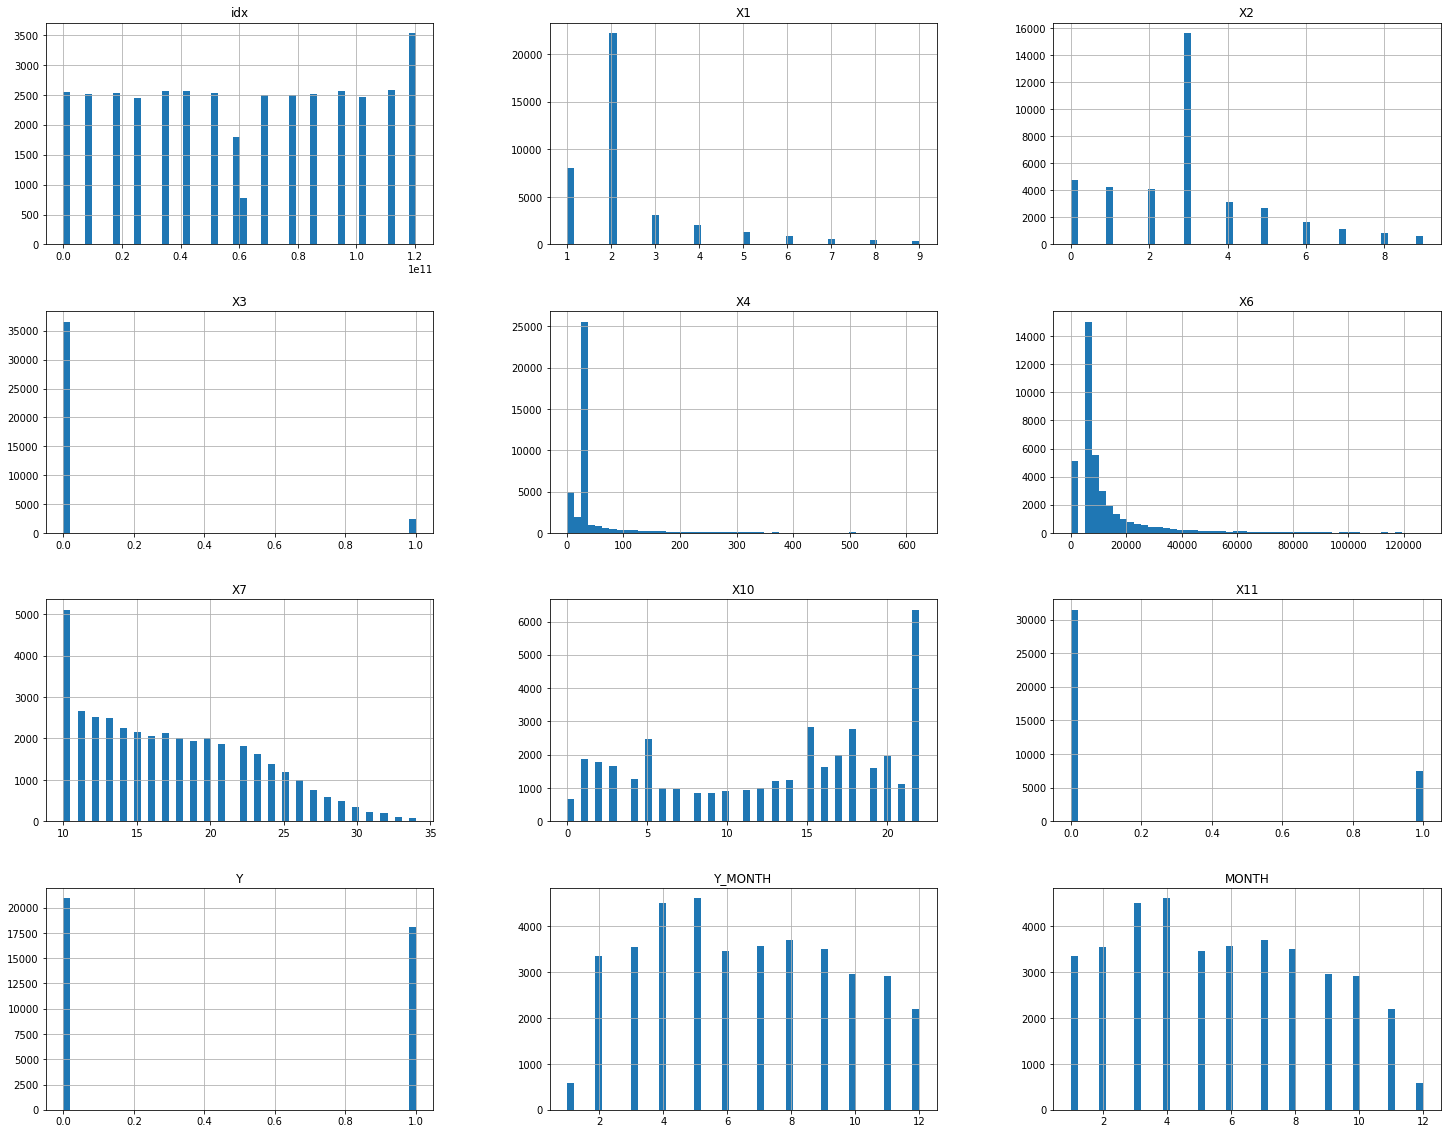

In [54]:
data.hist(bins=50, figsize=(25, 20))
plt.show()

### imputing null values

In [55]:
# data['X1'] = data['X1'].fillna(0)
# data['X2'] = data['X2'].fillna(0)
# data['X3'] = data['X3'].fillna(0)
# data['X4'] = data['X4'].fillna(0)
# data['X5'] = data['X5'].fillna(0)
# data['X8'] = data['X8'].fillna('unknown')
# data['X9'] = data['X9'].fillna('unknown')
# data['X11'] = data['X11'].fillna('unknown')
# data['X10'] = data['X10'].fillna(round(data['X10'].mean()))
# np.seterr(divide = 'ignore')
# data['X1'] = np.log(data['X1'])
# data['X2'] = np.sqrt(data['X2'])
# data['X3'] = np.sqrt(data['X3'])
# data['X4'] = np.sqrt(data['X4'])
# data['X5'] = np.sqrt(data['X5'])



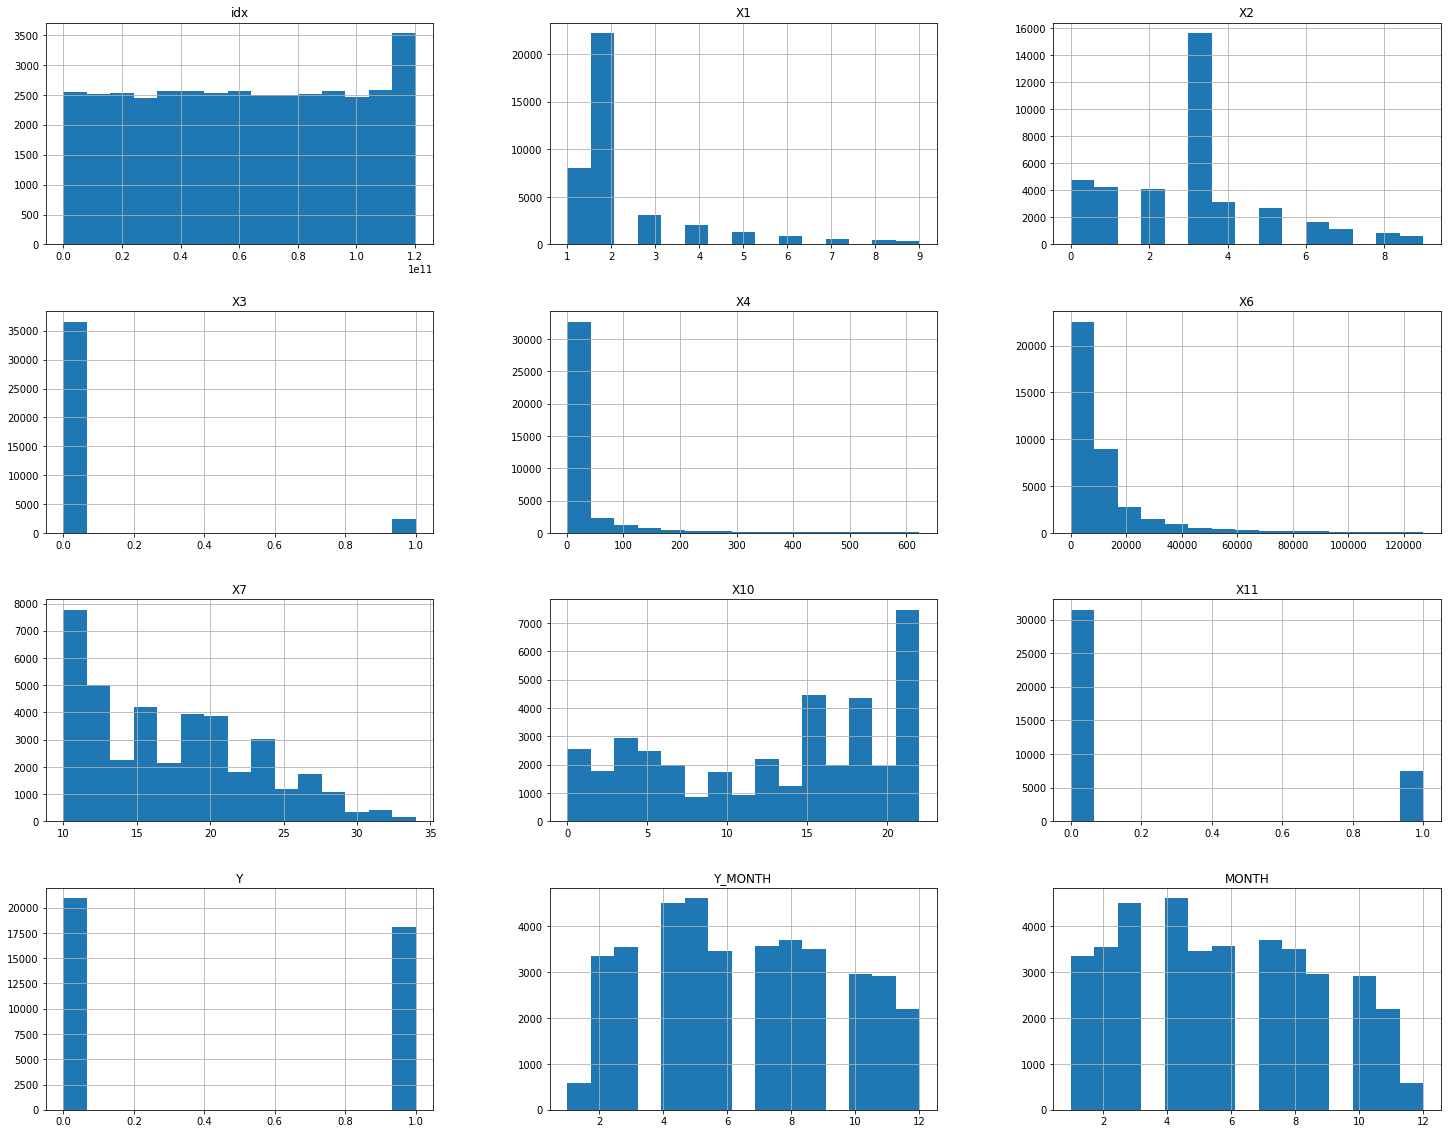

In [56]:
data.hist(bins=15, figsize=(25, 20))
plt.show()

In [57]:
print("Null values in X in percent\n", pd.DataFrame(round((data.isnull().sum()/data.shape[0])*100,2), columns = ['Percentage']))

Null values in X in percent
          Percentage
idx             0.0
X1              0.0
X2              0.0
X3              0.0
X4              0.0
X6              0.0
X7              0.0
X8              0.0
X9              0.0
X10             0.0
X11             0.0
Y               0.0
Y_MONTH         0.0
MONTH           0.0


### Outlier Detection

## Data Analysis and Feature Engineering

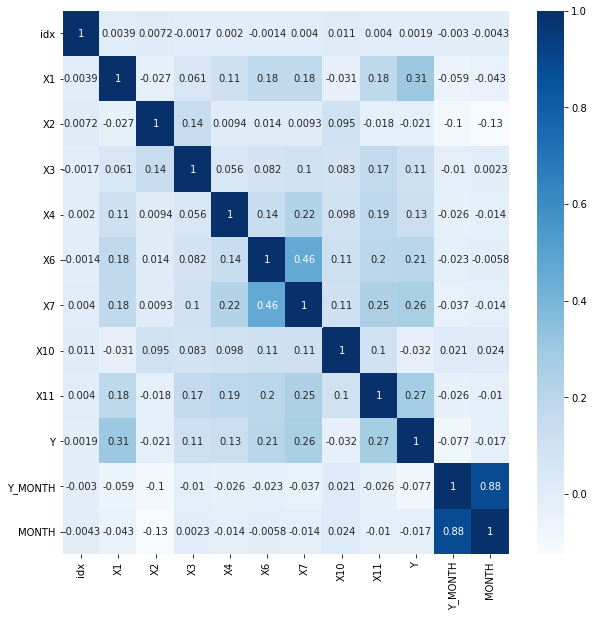

In [58]:
plt.figure(figsize=(10,10))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True,cmap ='Blues')
plt.show()

X1 has highest correlation and X3, X4, X6, X7, X11 has positive

**Exploratory Data Analysis**

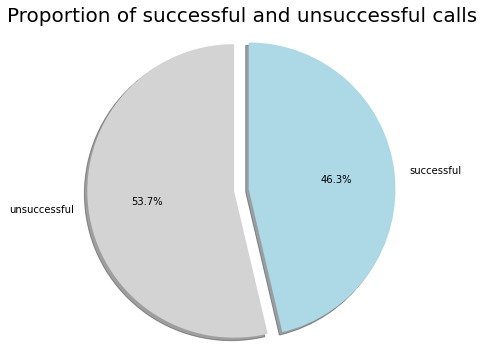

In [122]:
labels = 'unsuccessful', 'successful'
sizes = [data.Y[data['Y']==0].count(), \
         data.Y[data['Y']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ['lightgrey', 'lightblue'])
ax1.axis('equal')
plt.title("Proportion of successful and unsuccessful calls", size = 20)
plt.show()

# Number of Advisor participated each month

[Text(0, 0.5, 'Number of Advisors'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Number of Advisor participated each month')]

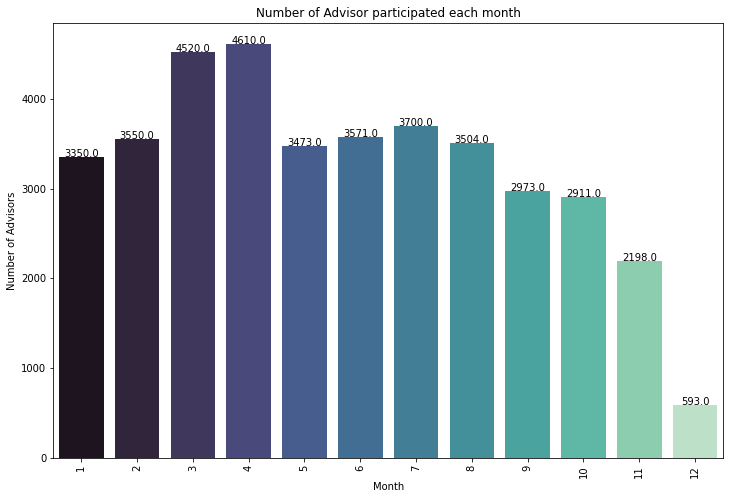

In [123]:
df_1 = pd.DataFrame(data.groupby(by=["MONTH"]).count()['idx'])
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.barplot(x=df_1.index, y=df_1.idx, palette="mako")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
ax.set(xlabel='Month', ylabel='Number of Advisors', title='Number of Advisor participated each month')

# Number of Advisor with successful calls each month

[Text(0, 0.5, 'Number of Advisors'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Number of Advisor with successful call each month')]

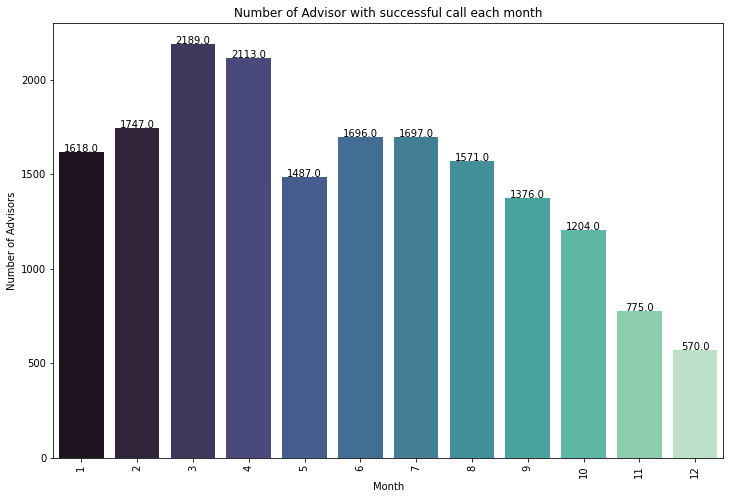

In [124]:
df_1 = data[data.Y == 1]
df_1 = pd.DataFrame(df_1.groupby(by=["MONTH"]).count()['idx'])
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.barplot(x=df_1.index, y=df_1.idx, palette="mako")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
ax.set(xlabel='Month', ylabel='Number of Advisors', title='Number of Advisor with successful call each month')

# Number of successful and unsuccessful sales call made each month 

Text(0.5, 1.0, 'Sales call each month by call success and failure')

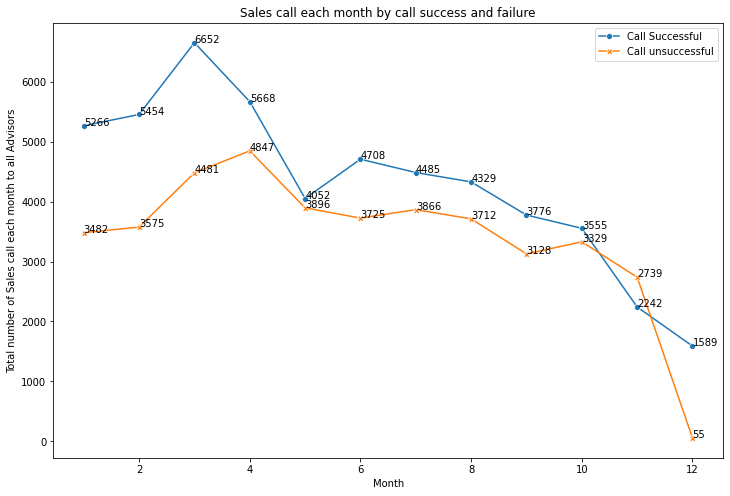

In [125]:
plt.figure(figsize=(12, 8))
df_1 = data[data.Y == 1]
df_2 = data[data.Y == 0]
df_1 = pd.DataFrame(df_1.groupby(by=["MONTH"]).sum()['X1'])
for x, y in zip(df_1.index, df_1.X1):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
     color = 'black') # set colour of line

df_2 = pd.DataFrame(df_2.groupby(by=["MONTH"]).sum()['X1'])
for x, y in zip(df_2.index, df_2.X1):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
     color = 'black') # set colour of line

sns.lineplot(x=df_1.index, y=df_1.X1, palette='husl', marker='o')
sns.lineplot(x=df_2.index, y=df_2.X1, palette='husl', marker='X')
plt.xlabel("Month")
plt.ylabel("Total number of Sales call each month to all Advisors")
plt.legend(['Call Successful', "Call unsuccessful"])
plt.title("Sales call each month by call success and failure")

The pattern for both the types of calls is almost same with higher number of successful calls in the first quater, in the second quater the number of call decresed by approximately 38% . In the the last quater, we can observe that the failure has overpowered the successful calls.

# Number of email sent each month 

Text(0.5, 1.0, 'Total number of marketing email delivered each month by call success and failure')

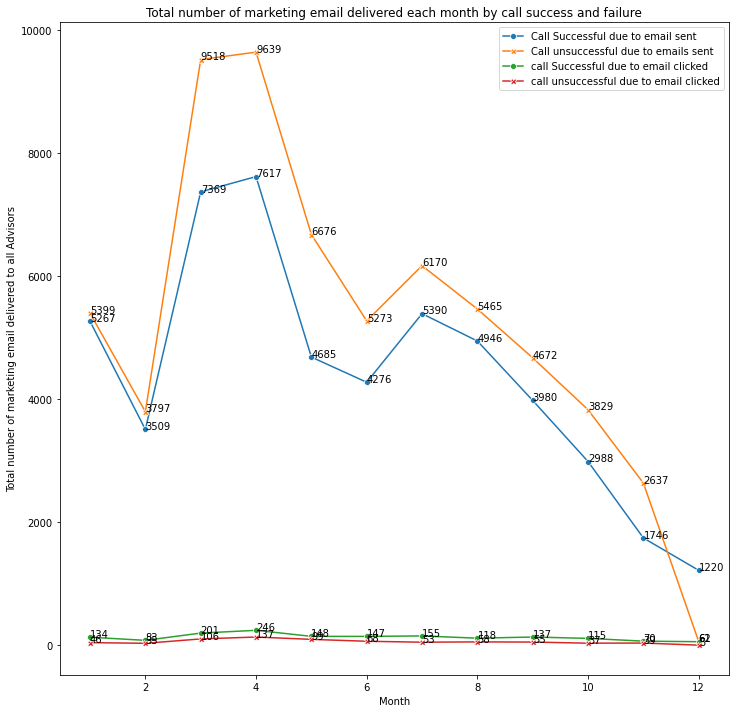

In [126]:
plt.figure(figsize=(12, 12))
df_1 = data[data.Y == 1]
df_2 = data[data.Y == 0]
df_1 = pd.DataFrame(df_1.groupby(by=["MONTH"]).sum()['X2'])
for x, y in zip(df_1.index, df_1.X2):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
     color = 'black') # set colour of line

df_2 = pd.DataFrame(df_2.groupby(by=["MONTH"]).sum()['X2'])
for x, y in zip(df_2.index, df_2.X2):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
     color = 'black') # set colour of line

sns.lineplot(x=df_1.index, y=df_1.X2, palette='husl', marker='o')
sns.lineplot(x=df_2.index, y=df_2.X2, palette='husl', marker='X')

df_3 = data[data.Y == 1]
df_4 = data[data.Y == 0]
df_3 = pd.DataFrame(df_3.groupby(by=["MONTH"]).sum()['X3'])
for x, y in zip(df_3.index, df_3.X3):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
     color = 'black') # set colour of line

df_4 = pd.DataFrame(df_4.groupby(by=["MONTH"]).sum()['X3'])
for x, y in zip(df_4.index, df_4.X3):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
     color = 'black') # set colour of line

sns.lineplot(x=df_3.index, y=df_3.X3, palette='husl', marker='o')
sns.lineplot(x=df_4.index, y=df_4.X3, palette='husl', marker='X')
plt.xlabel("Month")
plt.ylabel("Total number of marketing email delivered to all Advisors")
plt.legend(['Call Successful due to email sent', "Call unsuccessful due to emails sent", "call Successful due to email clicked", "call unsuccessful due to email clicked"])
plt.title("Total number of marketing email delivered each month by call success and failure")

Emails promotion does not play a significant role in call success and also we can observe that the number of clicks made on the emails are significantly less and does not drive the call success.

# Number of page view

Text(0.5, 1.0, 'Total marketing web pageview each month by call success and failure')

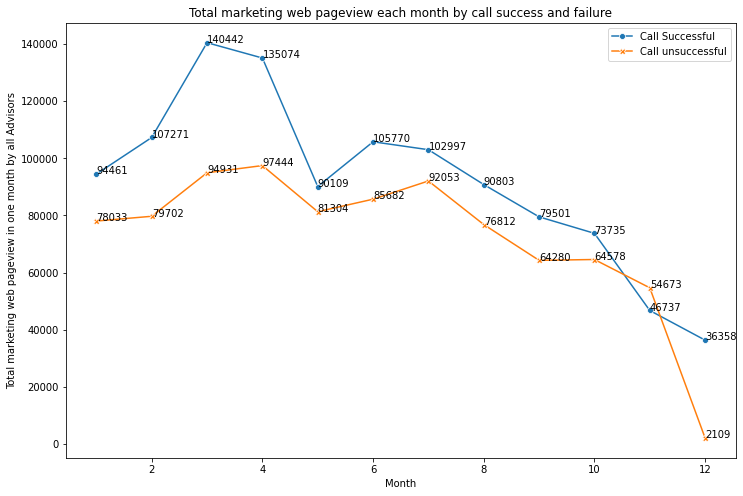

In [127]:
plt.figure(figsize=(12, 8))
df_1 = data[data.Y == 1]
df_2 = data[data.Y == 0]
df_1 = pd.DataFrame(df_1.groupby(by=["MONTH"]).sum()['X4'])
for x, y in zip(df_1.index, df_1.X4):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
     color = 'black') # set colour of line

df_2 = pd.DataFrame(df_2.groupby(by=["MONTH"]).sum()['X4'])
for x, y in zip(df_2.index, df_2.X4):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
     color = 'black') # set colour of line

sns.lineplot(x=df_1.index, y=df_1.X4, palette='husl', marker='o')
sns.lineplot(x=df_2.index, y=df_2.X4, palette='husl', marker='X')
plt.xlabel("Month")
plt.ylabel("Total marketing web pageview in one month by all Advisors")
plt.legend(['Call Successful', "Call unsuccessful"])
plt.title("Total marketing web pageview each month by call success and failure")

Page views is a driving force for call success and it also follows the similar uphill and downhill monthly sales call pattern.

# Sales Amount

Text(0.5, 1.0, 'Percentage Sales amount each month by call success and failure')

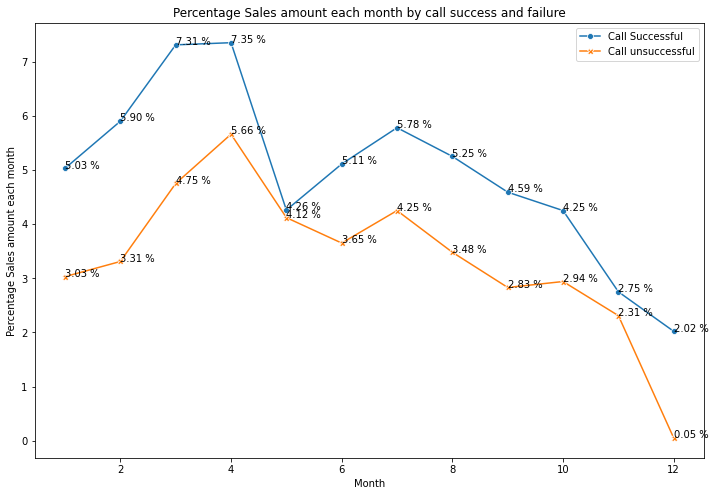

In [128]:
plt.figure(figsize=(12, 8))
df_1 = data[data.Y == 1]
df_2 = data[data.Y == 0]
df_1 = pd.DataFrame(df_1.groupby(by=["MONTH"]).sum()['X6'])
df_1['X6'] = round((df_1['X6']/data['X6'].sum())*100,2)
palette = ["grey","blue"]
df_2 = pd.DataFrame(df_2.groupby(by=["MONTH"]).sum()['X6'])
df_2['X6'] = round((df_2['X6']/data['X6'].sum())*100, 2)
sns.lineplot(x=df_1.index, y=df_1.X6, palette=palette, marker='o')
# label points on the plot
for x, y in zip(df_1.index, df_1.X6):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.2f} %'.format(y), # data label, formatted to ignore decimals
     color = 'black') # set colour of line
    
sns.lineplot(x=df_2.index, y=df_2.X6, palette=palette, marker='X')
for x, y in zip(df_2.index, df_2.X6):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.2f} %'.format(y), # data label, formatted to ignore decimals
     color = 'black') # set colour of line
plt.xlabel("Month")
plt.ylabel("Percentage Sales amount each month")
plt.legend(['Call Successful', "Call unsuccessful"])
plt.title("Percentage Sales amount each month by call success and failure")



### There is something happening in the 5th and the 6th month that everything decreased 

# Advisor tenure

Text(0.5, 1.0, 'Number of Advisor with distinct mutual funds sales with CG and how it affects call success')

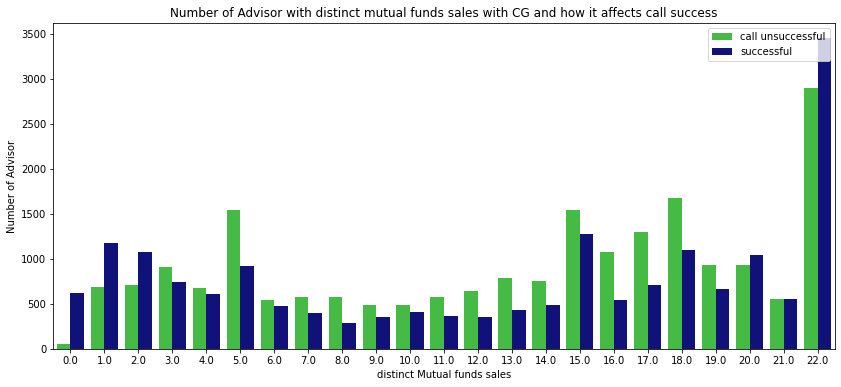

In [129]:

# ax = sns.displot(data, x='X10', hue='Y',kind = 'hist', multiple='stack',legend = True)
# ax.fig.set_size_inches(15,6)
# # sns.countplot(x='X10', hue = 'Y',data = data, palette=['limegreen', 'darkblue'])
# plt.xlabel("Advisor Tenure")

# plt.ylabel("Number of Advisor")
# plt.title("Number of Advisor with their tenure with CG and how it affects call success")
# plt.show

plt.figure(figsize=(14, 6))

sns.countplot(x='X10', hue = 'Y',data = data, \
              palette=['limegreen', 'darkblue'])
plt.xlabel("distinct Mutual funds sales")
plt.legend(['call unsuccessful', 'successful'], loc='upper right')
plt.ylabel("Number of Advisor")
plt.title("Number of Advisor with distinct mutual funds sales with CG and how it affects call success")



The newly joined advisors and very experienced advisors are prone to have call success. We need programs and incentive to grasp attention of adviors who are associated with CG for more than 4 years and less than 20 years.

# Distinct mutual funds sales

Text(0.5, 1.0, 'Number of Advisor with distinct mutual funds sales with CG and how it affects call success')

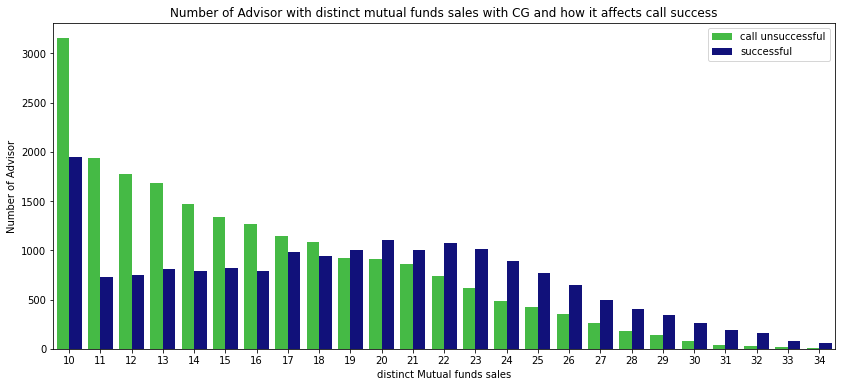

In [130]:
plt.figure(figsize=(14, 6))

sns.countplot(x='X7', hue = 'Y',data = data, \
              palette=['limegreen', 'darkblue'])
plt.xlabel("distinct Mutual funds sales")
plt.legend(['call unsuccessful', 'successful'], loc='upper right')
plt.ylabel("Number of Advisor")
plt.title("Number of Advisor with distinct mutual funds sales with CG and how it affects call success")

Advisors with atleast 19 distinct mutual funds are prone to have more success than failure in driving the sales.

# Digital subscription indicator

In [131]:
#!pip install natsort

Text(0.5, 1.0, 'Number of Advisor who took the digital subscription or not and how it affects call success')

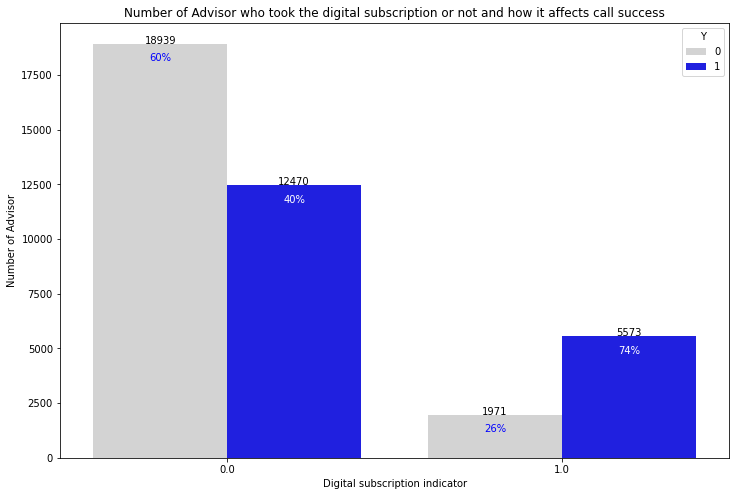

In [132]:
from natsort import index_natsorted, order_by_index

data1= data.reindex(index=order_by_index(data.index, index_natsorted(data['X11'])))

fig, ax = plt.subplots(figsize=(12,8))

graph = sns.countplot(x='X11', hue = 'Y',data = data1, \
              palette=['lightgrey', 'blue'])
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

    
bars = graph.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l - 800, '{0:.0%}'.format(height_l/total), ha="center", color = "blue")
    ax.text(right.get_x() + right.get_width()/2., height_r - 800, '{0:.0%}'.format(height_r/total), ha="center",  color = "white")    

plt.xlabel("Digital subscription indicator")
plt.ylabel("Number of Advisor")
plt.title("Number of Advisor who took the digital subscription or not and how it affects call success")

The advisors who do not take digital subscriptions are susceptible to more unsuccessful calls rather that the advisors who take subscription. We can also observe that there are very less number of advisors who take subscriptions which we need to focus on further to increase the subscription sales.

Text(0.5, 1.0, 'Number of Advisor with their segmentation and how it affects call success')

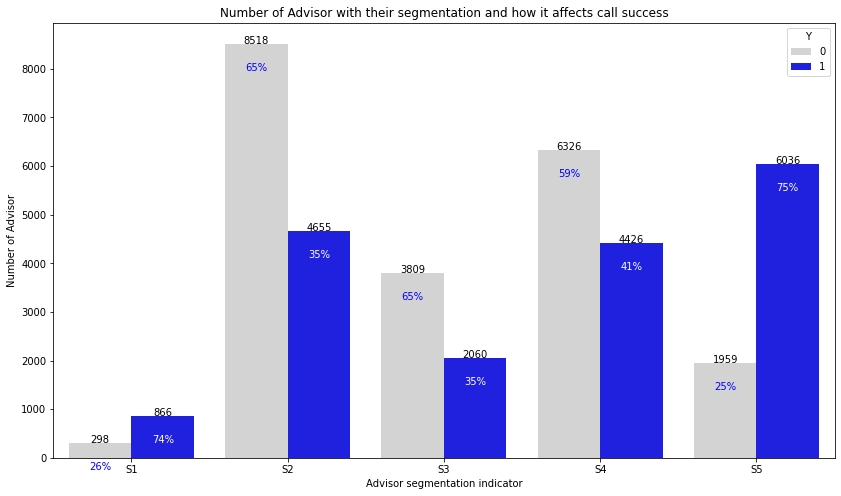

In [133]:
data1= data.reindex(index=order_by_index(data.index, index_natsorted(data['X8'])))
fig, ax = plt.subplots(figsize=(14,8))
graph = sns.countplot(ax= ax, x='X8', hue = 'Y',data = data1, \
              palette=['lightgrey', 'blue'])
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 5,height ,ha="center")

bars = graph.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l - 550, '{0:.0%}'.format(height_l/total), ha="center", color = "blue")
    ax.text(right.get_x() + right.get_width()/2., height_r - 550, '{0:.0%}'.format(height_r/total), ha="center",  color = "white") 
plt.xlabel("Advisor segmentation indicator")
plt.ylabel("Number of Advisor")
plt.title("Number of Advisor with their segmentation and how it affects call success")

From the above advisor segmention indicator plot, we can observe that, call success is higher in S1 and S5 segments and S4 could be targeted for improvisation after focusing on advisors with S1 and S5 segment.

Text(0.5, 1.0, 'Number of Advisor with their segmentation and how it affects call success')

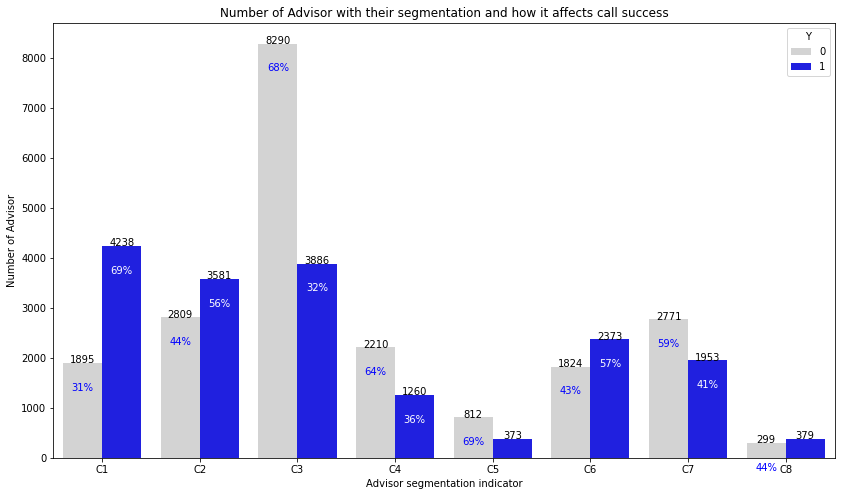

In [134]:

data1= data.reindex(index=order_by_index(data.index, index_natsorted(data['X9'])))

fig, ax = plt.subplots(figsize=(14,8))
graph = sns.countplot(x='X9', hue = 'Y',data = data1, \
              palette=['lightgrey', 'blue'])
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    
bars = graph.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l - 550, '{0:.0%}'.format(height_l/total), ha="center",color = "blue")
    ax.text(right.get_x() + right.get_width()/2., height_r - 550, '{0:.0%}'.format(height_r/total), ha="center",  color = "white") 

plt.xlabel("Advisor segmentation indicator")
plt.ylabel("Number of Advisor")
plt.title("Number of Advisor with their segmentation and how it affects call success")   

In this Advisor segmention indicator plot, we can make calls to advisors on priority with segments C1, C2, C6 and C8. After that we can focus on C7 Advisor segment.


# Modeling

In [59]:
temp = data.copy()

In [139]:
data1 = data.drop(['idx'],axis = 1)
data2 = pd.get_dummies(data1, columns=['X8','X9','X11'])

In [ ]:
data2.head()

,X1,X2,X3,X4,X6,X7,X10,Y,Y_MONTH,MONTH,X8_S1,X8_S2,X8_S3,X8_S4,X8_S5,X9_C1,X9_C2,X9_C3,X9_C4,X9_C5,X9_C6,X9_C7,X9_C8,X11_0.0,X11_1.0
0,2.0,3.0,0.0,34.0,0.00,10,22.0,0,9,8,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,2.0,0.0,0.0,34.0,5817.04,10,22.0,0,11,10,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,2.0,1.0,0.0,34.0,0.00,10,22.0,0,8,7,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2.0,2.0,0.0,34.0,0.00,10,22.0,0,7,6,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2.0,2.0,0.0,34.0,0.00,10,22.0,0,7,6,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
from plotly.subplots import make_subplots
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
y = data2.loc[:,'Y']
data2 = data2.drop(['Y'], axis = 1)
X = data2

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify= y, test_size=0.20, random_state=42)
print(X_train.shape,y_train.shape)
print(X_val.shape, y_val.shape)
# X_train = X_train.reset_index(drop =True)
# y_train = y_train.reset_index(drop = True)
# X_val = X_val.reset_index(drop = True)
# y_val = y_val.reset_index(drop = True)

(31162, 24) (31162,)
(7791, 24) (7791,)


# Logistic Regression

In [ ]:
# fit a logistic regression model to the data
def logisticRegression(train_x, train_y,test_x, test_y):
  model = LogisticRegression(max_iter = 1200, random_state= 42, n_jobs = -1)
  model.fit(train_x, train_y)
  print(model)
  # make predictions
  expected = test_y
  predicted = model.predict(test_x)
  # summarize the fit of the model
  print(classification_report(expected, predicted))
  print(confusion_matrix(expected, predicted))
  disp = plot_confusion_matrix(model, test_x, test_y,
                                 cmap=plt.cm.Blues)
  disp.ax_.set_title("Confusion Matrix")
  plt.figure(figsize=(10,6))
  sns.set(font_scale=1.4)
  print("Confusion Matrix")
  plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1200,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.71      0.83      0.76      4182
           1       0.75      0.60      0.67      3609

    accuracy                           0.72      7791
   macro avg       0.73      0.72      0.72      7791
weighted avg       0.73      0.72      0.72      7791

[[3480  702]
 [1450 2159]]
Confusion Matrix


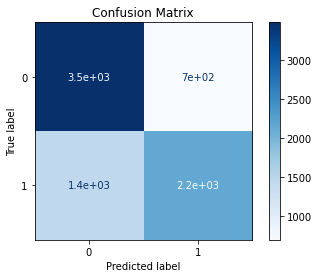

<Figure size 720x432 with 0 Axes>

None


In [ ]:
print(logisticRegression(X_train, y_train, X_val, y_val))

# Ensemble Methods

In [ ]:
data2 = pd.get_dummies(data1, columns=['X8','X9','X11'])
y = data2.loc[:,'Y']
data2 = data2.drop(['Y'], axis = 1)
X = data2
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify= y, test_size=0.20, random_state=42)
print(X_train.shape,y_train.shape)
print(X_val.shape, y_val.shape)
# X_train = X_train.reset_index(drop =True)
# y_train = y_train.reset_index(drop = True)
# X_val = X_val.reset_index(drop = True)
# y_val = y_val.reset_index(drop = True)

(31162, 24) (31162,)
(7791, 24) (7791,)


In [120]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier as GB
from sklearn.metrics import average_precision_score
from sklearn.ensemble import AdaBoostClassifier as ab
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier

from sklearn.linear_model import SGDClassifier as sg
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import numpy as np

In [ ]:
model_name=['naive_bayes','LogisticRegression','RandomForestClassifier','KNeighborsClassifier','GradientBoostingClassifier','AdaBoostClassifier','DecisionTreeClassifier']
models_list= [NB(),LR(max_iter=600),RF(),KNN(),GB(),ab(),dt()]
for i, j in zip(model_name, models_list):
    scores = cross_validate(j, X_train, y_train, cv=5)
    print(i+"--"+ "Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

naive_bayes--Accuracy: 0.66 (+/- 0.01)
LogisticRegression--Accuracy: 0.72 (+/- 0.02)
RandomForestClassifier--Accuracy: 0.78 (+/- 0.01)
KNeighborsClassifier--Accuracy: 0.64 (+/- 0.00)
GradientBoostingClassifier--Accuracy: 0.76 (+/- 0.01)
AdaBoostClassifier--Accuracy: 0.75 (+/- 0.02)
DecisionTreeClassifier--Accuracy: 0.71 (+/- 0.01)


In [ ]:
def plot_curve(train_scores,test_scores,train_sizes,fig_name,title,xlabel,ylabel):
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)


  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)


  plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
  plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")


  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

  plt.title(title)
  plt.xlabel(xlabel), 
  plt.ylabel(ylabel), 
  plt.legend(loc="best")
  #plt.tight_layout()
  #plt.savefig(fig_name, bbox_inches='tight')

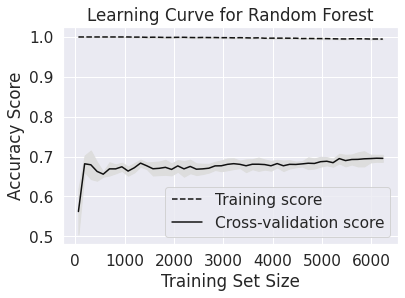

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(RF(), 
                                                        X_val, 
                                                        y_val,
                                                        cv = 5,
                                                        scoring='recall',                                                       
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

plot_curve(train_scores,test_scores,train_sizes,"RandomForest.png",
           "Learning Curve for Random Forest","Training Set Size","Accuracy Score")

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      4182
           1       0.78      0.74      0.76      3609

    accuracy                           0.78      7791
   macro avg       0.78      0.78      0.78      7791
weighted avg       0.78      0.78      0.78      7791

[[3434  748]
 [ 951 2658]]
Confusion Matrix


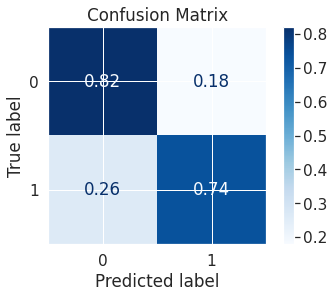

In [ ]:
rf = RF()
rf.fit(X_train,y_train)
y_score = rf.predict(X_val)
print(classification_report(y_val, rf.predict(X_val)))
print(confusion_matrix(y_val, rf.predict(X_val)))
disp = plot_confusion_matrix(rf, X_val, y_val,
                              cmap='Blues', normalize = 'true')
disp.ax_.set_title("Confusion Matrix")
print("Confusion Matrix")

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 50],
    'max_features': [2, 3, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [6, 10, 15, 20, 30, 50]
}
# Create a based model
rf = RF()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    print(predictions)
    #errors = abs(predictions - test_labels)
    #mape = 100 * np.mean(errors / test_labels)
    actual, pred = np.array(test_labels), np.array(predictions)
    mape = accuracy_score(actual, pred)*100
    print(mape)
    print('Model Performance')
    #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(mape))
    
    return mape

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed: 10.2min finished


In [ ]:
grid_accuracy = evaluate(best_grid, X_val, y_val)

[1 0 0 ... 0 1 1]
76.63971248876909
Model Performance
Accuracy = 76.64%.


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

def randomForest(model, train_x, train_y,test_x, test_y):
    rf = RF()
    model.fit(train_x,train_y)
    y_score = model.predict(test_x)
    print(classification_report(test_y, model.predict(test_x)))
    print(confusion_matrix(test_y, model.predict(test_x)))
    disp = plot_confusion_matrix(model, test_x, test_y,
                                 cmap='Blues', normalize = 'true')
    disp.ax_.set_title("Confusion Matrix")
    print("Confusion Matrix")
    
    

In [ ]:
print(randomForest(best_grid, X_train, y_train, X_val, y_val))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score


In [ ]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_val, label=y_val)
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

model = xgb.train(param, D_train, steps)

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_val, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_val, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_val, best_preds)))

# Deep Learning

In [ ]:
features = X
targets = y

In [ ]:
num_val_samples = int(len(features) * 0.2)
train_features = features[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_features = features[-num_val_samples:]
val_targets = targets[-num_val_samples:]

print("Number of training samples:", len(train_features))
print("Number of validation samples:", len(val_features))

Number of training samples: 31163
Number of validation samples: 7790


In [ ]:
counts_false = len(train_targets[train_targets == False])
counts_true = len(train_targets[train_targets == True])
print(counts_false,counts_true)

17693 13470


In [ ]:
mean = np.mean(train_features, axis=0)
train_features -= mean
val_features -= mean
std = np.std(train_features, axis=0)
train_features /= std
val_features /= std

In [ ]:

from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               6400      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 138,241
Trainable params: 138,241
Non-trainable params: 0
________________________________________________

In [ ]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Accuracy(name="Accuracy"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")]


history = model.fit(
    train_features,
    train_targets,
    batch_size=2048,
    epochs=50,
    verbose=2,
    callbacks=callbacks,
    validation_data=(val_features, val_targets),
)

Epoch 1/50
16/16 - 3s - loss: 732.0934 - fn: 5162.0000 - fp: 10818.0000 - tn: 6875.0000 - tp: 8308.0000 - Accuracy: 0.3494 - precision: 0.4344 - recall: 0.6168 - val_loss: 3.3261 - val_fn: 1111.0000 - val_fp: 2383.0000 - val_tn: 834.0000 - val_tp: 3462.0000 - val_Accuracy: 0.0797 - val_precision: 0.5923 - val_recall: 0.7571
Epoch 2/50
16/16 - 1s - loss: 4.5292 - fn: 5315.0000 - fp: 9674.0000 - tn: 8019.0000 - tp: 8155.0000 - Accuracy: 0.0606 - precision: 0.4574 - recall: 0.6054 - val_loss: 0.7340 - val_fn: 4320.0000 - val_fp: 133.0000 - val_tn: 3084.0000 - val_tp: 253.0000 - val_Accuracy: 0.0000e+00 - val_precision: 0.6554 - val_recall: 0.0553
Epoch 3/50
16/16 - 1s - loss: 1.1473 - fn: 5315.0000 - fp: 9199.0000 - tn: 8494.0000 - tp: 8155.0000 - Accuracy: 0.0109 - precision: 0.4699 - recall: 0.6054 - val_loss: 0.7240 - val_fn: 3882.0000 - val_fp: 311.0000 - val_tn: 2906.0000 - val_tp: 691.0000 - val_Accuracy: 0.0000e+00 - val_precision: 0.6896 - val_recall: 0.1511
Epoch 4/50
16/16 - 1s 

(0.0, 1.0)

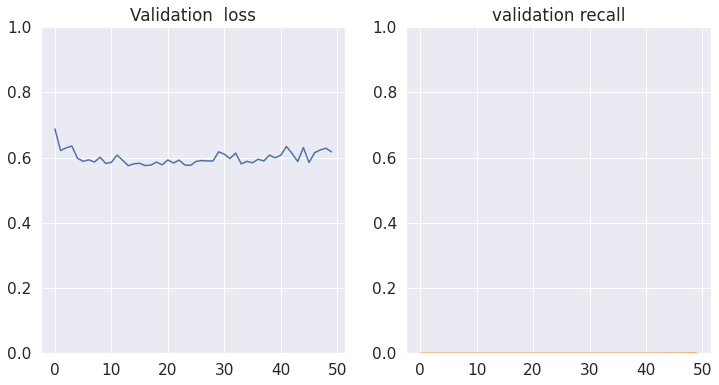

<Figure size 864x720 with 0 Axes>

In [ ]:
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(12,6))
plt.figure(figsize=(12,10))
ax1.plot(history.history['val_loss'])
ax1.set_title('Validation  loss')
ax2.plot(history.history['val_Accuracy'],'tab:orange')
ax2.set_title('validation recall')
ax1.set_ylim([0,1])
ax2.set_ylim([0,1])

(0.0, 1.0)

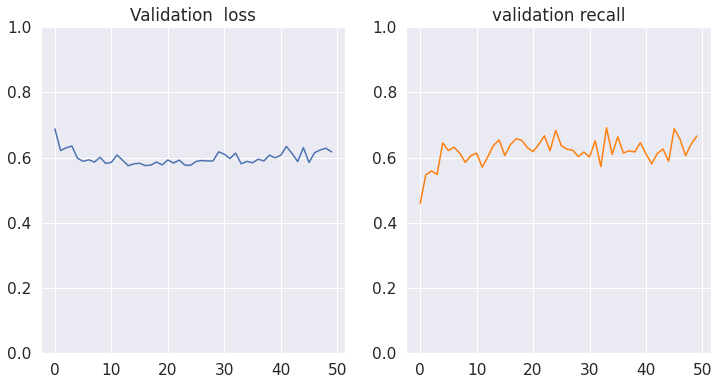

<Figure size 864x720 with 0 Axes>

In [ ]:
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(12,6))
plt.figure(figsize=(12,10))
ax1.plot(history.history['val_loss'])
ax1.set_title('Validation  loss')
ax2.plot(history.history['val_recall'],'tab:orange')
ax2.set_title('validation recall')
ax1.set_ylim([0,1])
ax2.set_ylim([0,1])

Text(0.5, 1.0, 'False Negative rate')

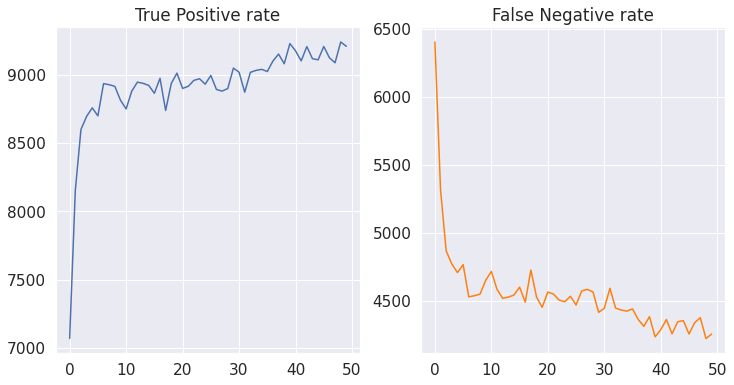

<Figure size 864x720 with 0 Axes>

In [ ]:
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(12,6))
plt.figure(figsize=(12,10))
ax1.plot(history.history['tp'])
ax1.set_title('True Positive rate')
ax2.plot(history.history['fn'],'tab:orange')
ax2.set_title('False Negative rate')

# SHAP values

In [ ]:
rf = RandomForestClassifier(n_estimators = 15, max_depth =40, random_state=0)
rf.fit(X_train, y_train)  
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.figure(figsize = (10,10))
plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
!pip install shap

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_val)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_val)

# Log transform

In [110]:
data_copy = data.copy()

In [111]:
data_copy.describe()

,idx,X1,X2,X3,X4,X6,X7,X10,X11,Y,Y_MONTH,MONTH
count,3.895300e+04,38953.000000,38953.000000,38953.000000,38953.000000,38953.000000,38953.000000,38953.000000,38953.000000,38953.000000,38953.000000,38953.000000
mean,6.169590e+10,2.377506,2.981285,0.060406,50.698508,13116.654321,17.309321,12.951146,0.193669,0.463199,6.525069,5.707750
std,3.786079e+10,1.496966,2.000586,0.238241,73.921027,16793.802794,5.707169,7.213278,0.395178,0.498650,3.047275,3.070185
min,2.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.576981e+10,2.000000,2.000000,0.000000,34.000000,5951.039167,12.000000,6.000000,0.000000,0.000000,4.000000,3.000000
50%,6.012955e+10,2.000000,3.000000,0.000000,34.000000,7563.625000,17.000000,15.000000,0.000000,0.000000,6.000000,5.000000
75%,9.448928e+10,2.000000,4.000000,0.000000,34.000000,13444.632500,22.000000,19.000000,0.000000,1.000000,9.000000,8.000000
max,1.202591e+11,9.000000,9.000000,1.000000,623.000000,127039.674467,34.000000,22.000000,1.000000,1.000000,12.000000,12.000000


In [112]:
data_copy['X2'] = data_copy['X2'].replace(0, 10e-6)
data_copy['X3'] = data_copy['X3'].replace(0, 10e-6)
data_copy['X6'] = data_copy['X6'].replace(0, 10e-6)
data_copy['X10'] = data_copy['X10'].replace(0, 10e-6)
data_copy['X11'] = data_copy['X11'].replace(0, 10e-6)

In [113]:
for col in ["X1","X2", "X3", "X4","X6", "X7"]:
  data_copy[col] = np.cbrt(data_copy[col])

data_copy["X10"] = np.sqrt(data_copy["X10"])

In [114]:
data.isnull().sum()

idx        0
X1         0
X2         0
X3         0
X4         0
X6         0
X7         0
X8         0
X9         0
X10        0
X11        0
Y          0
Y_MONTH    0
MONTH      0
dtype: int64

In [115]:
data_copy.describe()

,idx,X1,X2,X3,X4,X6,X7,X10,X11,Y,Y_MONTH,MONTH
count,3.895300e+04,38953.000000,38953.000000,38953.000000,38953.000000,38953.000000,38953.000000,38953.000000,38953.000000,38953.000000,38953.000000,38953.000000
mean,6.169590e+10,1.291732,1.283163,0.080649,3.319082,19.859932,2.555918,3.384359,0.193677,0.463199,6.525069,5.707750
std,3.786079e+10,0.231615,0.529157,0.233108,1.101419,9.674411,0.281628,1.223643,0.395174,0.498650,3.047275,3.070185
min,2.000000e+00,1.000000,0.021544,0.021544,1.000000,0.021544,2.154435,0.003162,0.000010,0.000000,1.000000,1.000000
25%,2.576981e+10,1.259921,1.259921,0.021544,3.239612,18.121644,2.289428,2.449490,0.000010,0.000000,4.000000,3.000000
50%,6.012955e+10,1.259921,1.442250,0.021544,3.239612,19.629534,2.571282,3.872983,0.000010,0.000000,6.000000,5.000000
75%,9.448928e+10,1.259921,1.587401,0.021544,3.239612,23.778419,2.802039,4.358899,0.000010,1.000000,9.000000,8.000000
max,1.202591e+11,2.080084,2.080084,1.000000,8.540750,50.270491,3.239612,4.690416,1.000000,1.000000,12.000000,12.000000


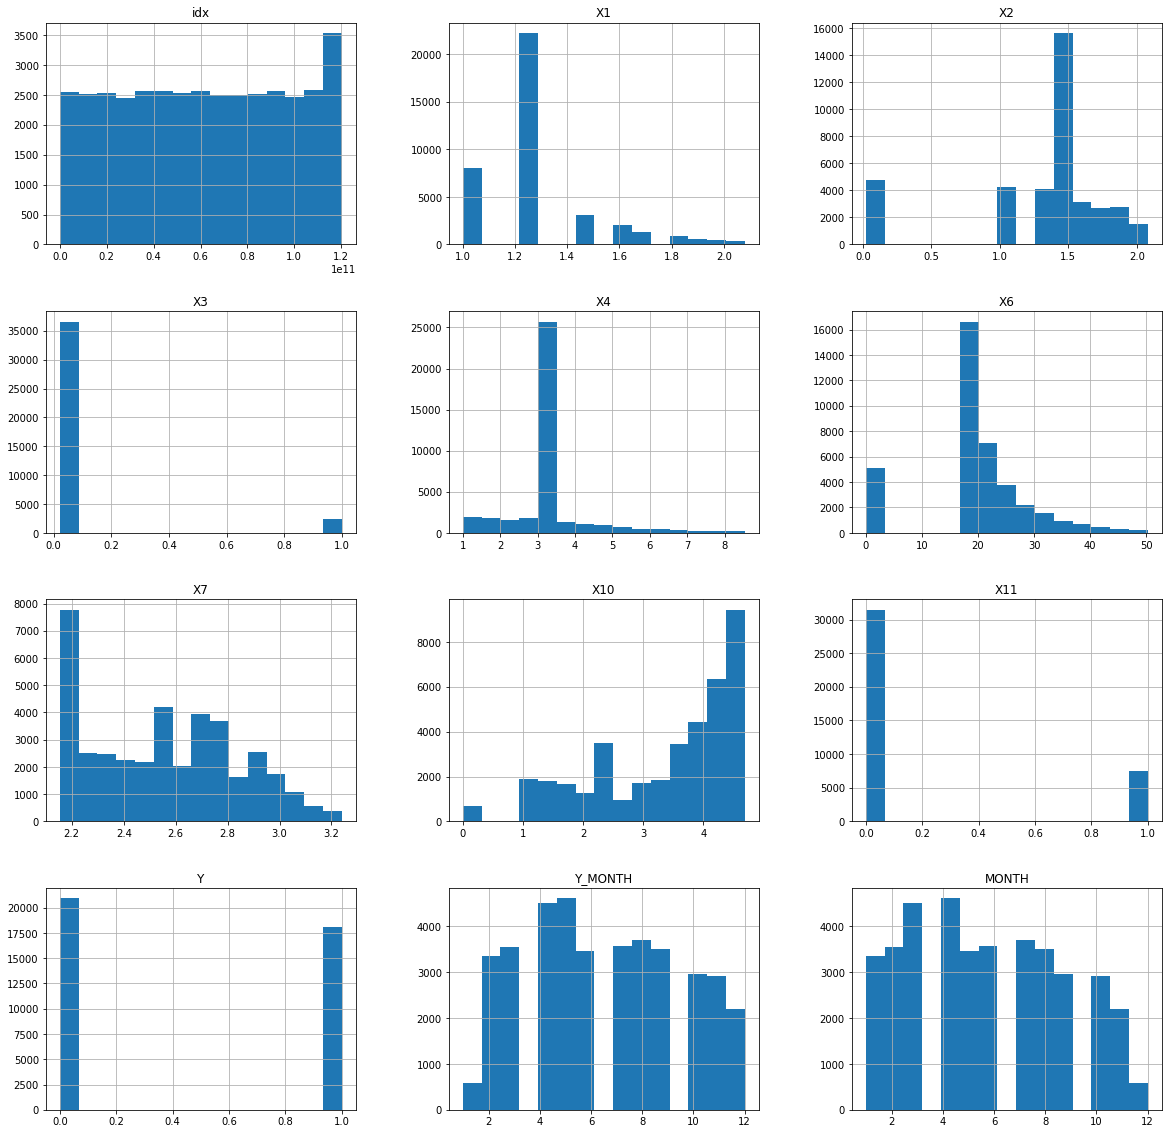

In [116]:
data_copy.hist(bins=15, figsize=(20, 20))
plt.show()

In [117]:
data1 = data_copy.drop(['idx'],axis = 1)
data2 = pd.get_dummies(data1, columns=['X8','X9','X11'])

In [118]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
y = data2.loc[:,'Y']
data2 = data2.drop(['Y'], axis = 1)
X = data2

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify= y, test_size=0.20, random_state=42)
print(X_train.shape,y_train.shape)
print(X_val.shape, y_val.shape)

(31162, 24) (31162,)
(7791, 24) (7791,)


In [121]:
model_name=['naive_bayes','LogisticRegression','RandomForestClassifier','KNeighborsClassifier','GradientBoostingClassifier','AdaBoostClassifier','DecisionTreeClassifier']
models_list= [NB(),LR(max_iter=600),RF(),KNN(),GB(),ab(),dt()]
for i, j in zip(model_name, models_list):
    scores = cross_validate(j, X_train, y_train, cv=5)
    print(i+"--"+ "Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

naive_bayes--Accuracy: 0.71 (+/- 0.01)
LogisticRegression--Accuracy: 0.73 (+/- 0.02)
RandomForestClassifier--Accuracy: 0.78 (+/- 0.01)
KNeighborsClassifier--Accuracy: 0.69 (+/- 0.01)
GradientBoostingClassifier--Accuracy: 0.76 (+/- 0.01)
AdaBoostClassifier--Accuracy: 0.75 (+/- 0.02)
DecisionTreeClassifier--Accuracy: 0.71 (+/- 0.01)
